# CONVOLUTIONAL NEURALNETWORKS FOR CLASSIFICATION OF CAR MODELS (TRANSFERLEARNING|DEPLOYMENT)

## Problem Statement:

Classification of images of the cars to their respective labels using Deep Learning Techniques.

**Class Labels:**
1. Creta
2. Innova
3. Nano
4. Scorpio
5. Range Rover

## Project Pipeline/Work Flow:

1. **Data Collection**<br>
2. **Image Visualization with their class labels**<br>
3. **Model Building**
        3.1 Base Model(CNN Based)
        3.2 Model 1(CNN + Image Augmentation)
        3.3 Model 2(CNN +Image Augmentation + Batch Normalization)
        3.4 Model 3(CNN + Image Augmentation + Drop Out)
        3.5 Final Model(Transfer Learning + callbacks)
4. **Visualize the predictions**<br>
5. **Analysis of the accuracy and loss of all the models built**<br>

## 1. Data Collection

We have scraped the images belonging to 5 classes of cars using a python package **"Bing Image Downloader"** which is an open-source library of pypi. Link: https://pypi.org/project/bing-image-downloader/

**Installation:**

pip install bing-image-downloader

**Usage:**

from bing_image_downloader import downloader<br>

downloader.download(query_string, limit=100,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

**Arguments:**

query_string : String to be searched.<br>
limit : (optional, default is 100) Number of images to download.<br>
output_dir : (optional, default is 'dataset') Name of output dir.<br>
adult_filter_off : (optional, default is True) Enable of disable adult filteration.<br>
force_replace : (optional, default is False) Delete folder if present and start a fresh download.<br>
timeout : (optional, default is 60) timeout for connection in seconds.<br>
verbose : (optional, default is True) Enable downloaded message.



**Challenge Faced:** Most of the downloads from the Bing Image Downloader were of "JPG" format which our models failed to recognize as a proper image format. We had to change all the JPG to PNG using the below code.

**Other Web Scraping libraries available:**<br>
    1. Google Chrome extension(Download all images)<br>
    2. Google Image Downloader(pypi)    

## Import Libraries

In [9]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,CSVLogger
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing import image
from matplotlib.pyplot import rcParams
import cv2
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers, optimizers
import gradio as gr
import tensorflow as tf 
import numpy as np
import requests
from tensorflow.keras.models import load_model

## Data path

In [27]:
data_folder = "C:\\Users\\Kishore1\\Downloads\\cars new\\"

In [11]:
train = tf.keras.preprocessing.image_dataset_from_directory(data_folder,validation_split=0.2,subset="training",
                                                            seed=100,image_size=(224, 224),batch_size=32)

Found 239 files belonging to 5 classes.
Using 192 files for training.


In [12]:
valid = tf.keras.preprocessing.image_dataset_from_directory(data_folder,validation_split=0.2,subset="validation",
                                                            seed=100,image_size=(224, 224),batch_size=32)

Found 239 files belonging to 5 classes.
Using 47 files for validation.


## Class Names

In [ ]:
class_names = train.class_names
print(class_names)

['Creta', 'Innova', 'Nano', 'Range Rover', 'Scorpio']


## 2. Image Visualization with their class labels

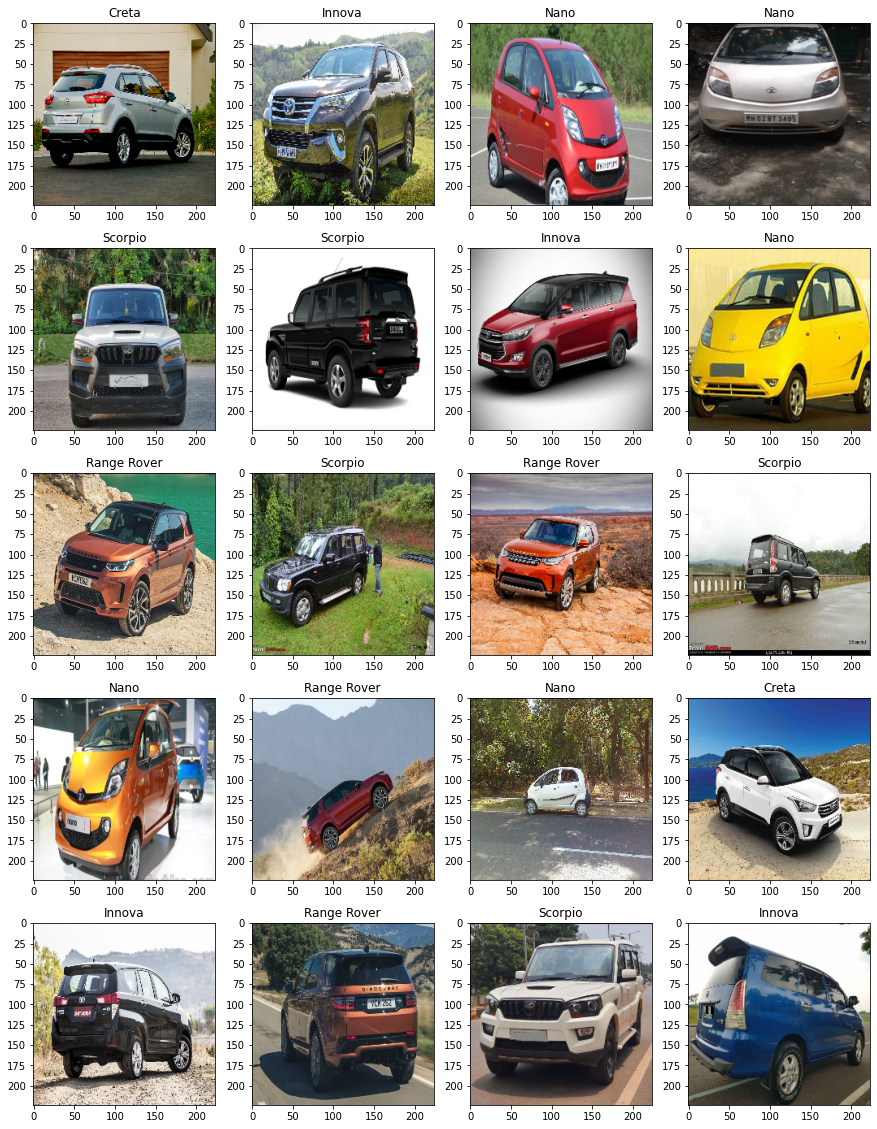

In [ ]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(20):
        plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])

## User-Defined function to plot the performance

In [ ]:
def plot_performance(model_history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.plot(model_history.history['accuracy'], 'r', label='train_acc')
    plt.plot(model_history.history['val_accuracy'], 'g', label='val_acc')
    plt.legend()
    plt.title("Train-Validation accuracy vs Epochs")
    
    plt.subplot(1,2,2)
    plt.grid(True)
    plt.plot(model_history.history['loss'], 'r--', label='train_loss')
    plt.plot(model_history.history['val_loss'], 'g--', label='val_loss')
    plt.title("Train-Validation Loss vs Epochs")
    plt.legend()
    plt.show()

## 3. Model Development

## 3.1 Base Model(CNN Based)

A Sequential model with 2 layers of Con2D and maxpool2D and an output dense layer.

In [ ]:
model = Sequential()

# Convolution + Maxpool2D Layer 
model.add(Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

# Output layer
model.add(Dense(5,activation = 'softmax'))

# Complile the model
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=["accuracy"])

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 5)                 103685    
Total params: 109,205
Trainable params: 109,205
Non-trainable params: 0
__________________________________________________

In [ ]:
# Fit the model and run for 30 iterations

hist = model.fit(train,validation_data=valid,epochs=30,verbose=2,batch_size=8)

Epoch 1/30
6/6 - 9s - loss: 152.1508 - accuracy: 0.2021 - val_loss: 20.8008 - val_accuracy: 0.4043
Epoch 2/30
6/6 - 8s - loss: 11.6512 - accuracy: 0.3032 - val_loss: 2.4379 - val_accuracy: 0.3191
Epoch 3/30
6/6 - 8s - loss: 1.1953 - accuracy: 0.6117 - val_loss: 2.4498 - val_accuracy: 0.2979
Epoch 4/30
6/6 - 8s - loss: 0.5651 - accuracy: 0.8404 - val_loss: 2.3544 - val_accuracy: 0.4043
Epoch 5/30
6/6 - 8s - loss: 0.3034 - accuracy: 0.9096 - val_loss: 2.1833 - val_accuracy: 0.3830
Epoch 6/30
6/6 - 8s - loss: 0.1076 - accuracy: 0.9894 - val_loss: 2.1845 - val_accuracy: 0.3830
Epoch 7/30
6/6 - 8s - loss: 0.0328 - accuracy: 0.9947 - val_loss: 2.5396 - val_accuracy: 0.4043
Epoch 8/30
6/6 - 8s - loss: 0.0162 - accuracy: 0.9947 - val_loss: 2.7652 - val_accuracy: 0.4681
Epoch 9/30
6/6 - 8s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 2.8742 - val_accuracy: 0.4255
Epoch 10/30
6/6 - 8s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.9527 - val_accuracy: 0.4255
Epoch 11/30
6/6 - 8s - loss: 0.0013

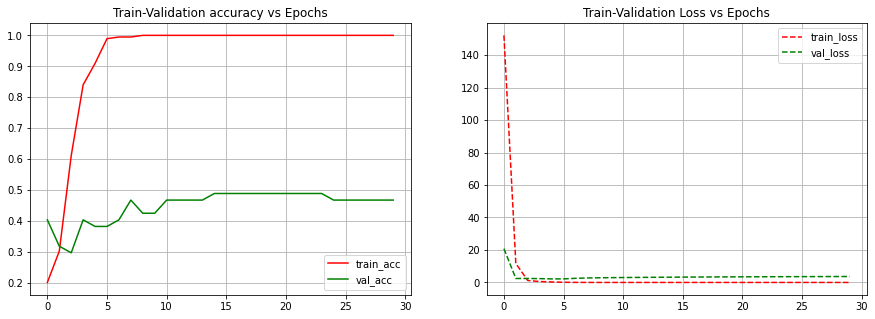

In [ ]:
# Analyse the model performance

plot_performance(model.history)

**Observations:**
    
1. Base model is severely overfitted on the train data.
2. Loss does not seem to be reducing after a few initial epoch and remains constant since then.
3. Train accuracy reaches 100% after just 5 epochs shows the degree of overfittng.

**Steps to handle overfitting:**

1. Use of Image Augmentation to make the model learn of the different versions of the training data.
2. Use of L1/L2 regularization, Drop out, Batch Normalization.
3. Use of callbacks such as Early Stopping.
4. Varying the learning rate of the optimizer.

##  3.2 Model 1(CNN + Image Augmentation)

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  validation_split=0.2, 
                                  horizontal_flip=True)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [15]:
image_shape=(224,224,3)
train_data=train_datagen.flow_from_directory(data_folder,subset="training",
                                         target_size=image_shape[:2],
                                         class_mode = 'categorical',
                                         batch_size=5,shuffle=True)

Found 194 images belonging to 5 classes.


In [16]:
val_data=test_datagen.flow_from_directory(data_folder,
                                       subset="validation",
                                       target_size=image_shape[:2],
                                       class_mode = 'categorical',
                                       batch_size=5,shuffle=True)

Found 45 images belonging to 5 classes.


In [ ]:
model1 = Sequential()

model1.add(Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
model1.add(MaxPooling2D(3,3))
model1.add(Conv2D(16,(3,3),activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())

model1.add(Dense(5,activation = 'softmax'))

model1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 103685    
Total params: 109,205
Trainable params: 109,205
Non-trainable params: 0
________________________________________________

In [ ]:
hist_1 = model1.fit(
  train_data,
  validation_data=val_data,
  epochs=30,
  verbose=2,
  batch_size=5,
  steps_per_epoch=len(train_data),
  validation_steps=len(val_data)
)

Epoch 1/30
39/39 - 14s - loss: 1.7614 - accuracy: 0.2356 - val_loss: 1.5756 - val_accuracy: 0.3864
Epoch 2/30
39/39 - 13s - loss: 1.5540 - accuracy: 0.3089 - val_loss: 1.4647 - val_accuracy: 0.3864
Epoch 3/30
39/39 - 13s - loss: 1.4201 - accuracy: 0.4241 - val_loss: 1.4135 - val_accuracy: 0.4091
Epoch 4/30
39/39 - 13s - loss: 1.2839 - accuracy: 0.4869 - val_loss: 1.3162 - val_accuracy: 0.4773
Epoch 5/30
39/39 - 14s - loss: 1.1414 - accuracy: 0.5497 - val_loss: 1.4617 - val_accuracy: 0.4545
Epoch 6/30
39/39 - 13s - loss: 1.0601 - accuracy: 0.5916 - val_loss: 1.2395 - val_accuracy: 0.4773
Epoch 7/30
39/39 - 13s - loss: 0.9433 - accuracy: 0.6283 - val_loss: 1.4194 - val_accuracy: 0.4773
Epoch 8/30
39/39 - 13s - loss: 0.8960 - accuracy: 0.7120 - val_loss: 1.5773 - val_accuracy: 0.5227
Epoch 9/30
39/39 - 13s - loss: 0.7860 - accuracy: 0.6963 - val_loss: 1.3732 - val_accuracy: 0.5682
Epoch 10/30
39/39 - 14s - loss: 0.7697 - accuracy: 0.7225 - val_loss: 1.2696 - val_accuracy: 0.5682
Epoch 11/

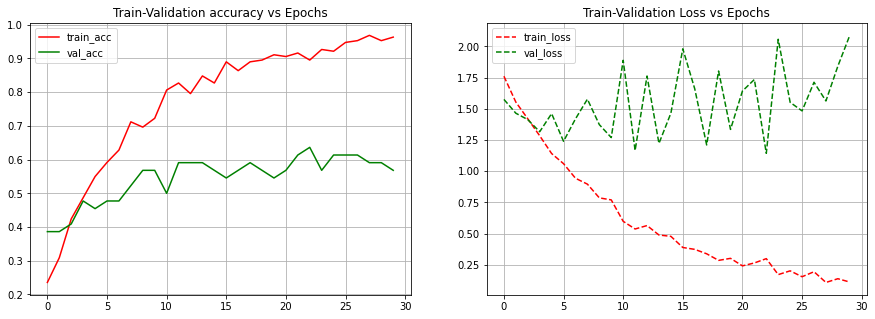

In [ ]:
plot_performance(model1.history)

**Observation:**

1. Although, there is overfitting on the train, the difference between the train and test accuracy is reduced.
2. The loss of validation seems to be fluctuating hence is its accuracy.
3. Train loss shows a smooth downwards trend.

##  3.3 Model 2(CNN +Image Augmentation + Batch Normalization)

In [ ]:
model2 = Sequential(name='Batch_Normalization')
model2.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape))
model2.add(MaxPool2D(pool_size=2, strides=2))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(MaxPool2D(pool_size=2, strides=2))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(MaxPool2D(pool_size=2, strides=2))
model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(units=512, activation='relu'))
model2.add(Dense(units=256, activation='relu'))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=5, activation='sigmoid'))
print(model2.summary())

Model: "Batch_Normalization"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 32)

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


hist_2 = model2.fit_generator(train_data,
                             epochs=30,
                             verbose=2,
                             steps_per_epoch=len(train_data),
                             validation_data=val_data,
                             validation_steps=len(val_data))

Epoch 1/30
39/39 - 21s - loss: 3.4649 - accuracy: 0.2513 - val_loss: 2.1007 - val_accuracy: 0.2500
Epoch 2/30
39/39 - 20s - loss: 2.7682 - accuracy: 0.3979 - val_loss: 2.5338 - val_accuracy: 0.2273
Epoch 3/30
39/39 - 20s - loss: 1.9116 - accuracy: 0.4817 - val_loss: 1.7883 - val_accuracy: 0.2500
Epoch 4/30
39/39 - 20s - loss: 1.0902 - accuracy: 0.6073 - val_loss: 3.3116 - val_accuracy: 0.2500
Epoch 5/30
39/39 - 20s - loss: 1.0571 - accuracy: 0.6178 - val_loss: 5.8009 - val_accuracy: 0.2500
Epoch 6/30
39/39 - 20s - loss: 0.9204 - accuracy: 0.6754 - val_loss: 4.1838 - val_accuracy: 0.2500
Epoch 7/30
39/39 - 20s - loss: 0.4346 - accuracy: 0.8325 - val_loss: 4.7619 - val_accuracy: 0.2500
Epoch 8/30
39/39 - 22s - loss: 0.5822 - accuracy: 0.8325 - val_loss: 3.9109 - val_accuracy: 0.2500
Epoch 9/30
39/39 - 20s - loss: 0.7788 - accuracy: 0.7801 - val_loss: 3.3643 - val_accuracy: 0.2727
Epoch 10/30
39/39 - 20s - loss: 0.5916 - accuracy: 0.7644 - val_loss: 4.5957 - val_accuracy: 0.2955
Epoch 11/

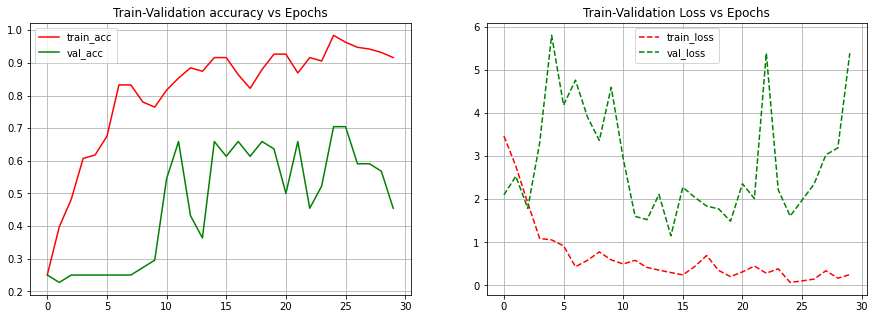

In [ ]:
plot_performance(model2.history)

**Observation:**

1. Although, there is overfitting on the train, the difference between the train and test accuracy is furthermore reduced.
2. The loss of validation seems to be fluctuating hence is its accuracy.
3. Train loss shows a smooth downwards trend.

## 3.4 Model 3(CNN + Image Augmentation + Drop Out)

In [ ]:
model3 = Sequential(name='Dropout')
model3.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape))
model3.add(MaxPool2D(pool_size=2, strides=2))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2, strides=2))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2, strides=2))
model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(units=512, activation='relu'))
model3.add(Dense(units=256, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=5, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 5)                 103685    
Total params: 109,205
Trainable params: 109,205
Non-trainable params: 0
__________________________________________________

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


hist_3 = model3.fit_generator(train_data,
                             epochs=30,
                             verbose=2,
                             steps_per_epoch=len(train_data),
                             validation_data=val_data,
                             validation_steps=len(val_data))

Epoch 1/30
39/39 - 22s - loss: 1.7096 - accuracy: 0.2147 - val_loss: 1.6096 - val_accuracy: 0.1818
Epoch 2/30
39/39 - 22s - loss: 1.6097 - accuracy: 0.2147 - val_loss: 1.6062 - val_accuracy: 0.2500
Epoch 3/30
39/39 - 21s - loss: 1.6127 - accuracy: 0.2147 - val_loss: 1.6057 - val_accuracy: 0.2500
Epoch 4/30
39/39 - 20s - loss: 1.6081 - accuracy: 0.2461 - val_loss: 1.6037 - val_accuracy: 0.2500
Epoch 5/30
39/39 - 21s - loss: 1.6033 - accuracy: 0.2461 - val_loss: 1.6015 - val_accuracy: 0.2500
Epoch 6/30
39/39 - 20s - loss: 1.5800 - accuracy: 0.2461 - val_loss: 1.5170 - val_accuracy: 0.2500
Epoch 7/30
39/39 - 20s - loss: 1.5688 - accuracy: 0.3455 - val_loss: 1.5224 - val_accuracy: 0.2500
Epoch 8/30
39/39 - 21s - loss: 1.5169 - accuracy: 0.3455 - val_loss: 1.4748 - val_accuracy: 0.3636
Epoch 9/30
39/39 - 20s - loss: 1.4161 - accuracy: 0.3874 - val_loss: 1.4323 - val_accuracy: 0.3182
Epoch 10/30
39/39 - 21s - loss: 1.2935 - accuracy: 0.4660 - val_loss: 1.8441 - val_accuracy: 0.3864
Epoch 11/

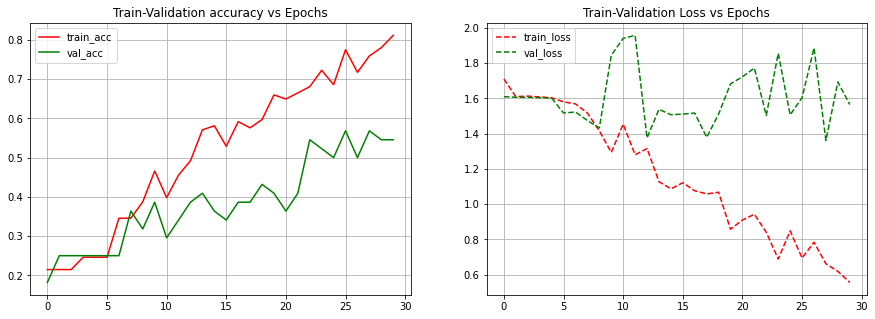

In [ ]:
plot_performance(model3.history)

**Observation:**

1. Although, there is overfitting on the train, the difference between the train and test accuracy is reduced.
2. The loss of validation seems to be fluctuating hence is its accuracy.
3. Train loss shows a smooth downwards trend.

## 3.5 Final Model(Transfer Learning + callbacks)

**Steps taken to arrive at the best and final model:**

1. Use of pre-trined weights from MobileNet for the 70 convolutional layers.
2. Open up covolutional layers from 71st layer to train with a dense hidden layer of 512 neurons.
3. These layers account for optimization of weights through backpropagation.
4. Use of GlobalAveragePooling2D.
5. Use of "sgd" optimizer.
6. Use of callbacks(EarlyStopping, ModelCheckpoint, CSVLogger).

In [ ]:
base_model=tf.keras.applications.MobileNet(input_shape=image_shape,include_top=False)

base_model.trainable=False

for layer in base_model.layers[71:]:
    layer.trainable=True

model_final=Sequential([base_model,
                          GlobalAveragePooling2D(),
                          Dense(512,activation='relu'),
                          Dense(5,activation='softmax')])

model_final.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=10)
check_point=ModelCheckpoint('C:/Users/Kishore1/Downloads/cars new/Model_weights/model.{epoch:02d}-{val_loss:.2f}.h5',)
csv_logger = CSVLogger('C:/Users/Kishore1/Downloads/cars new/training.log')

In [ ]:
model_final.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 2565      
Total params: 3,756,229
Trainable params: 527,365
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
model_final.fit_generator(train_data,epochs=30,steps_per_epoch=len(train_data),validation_data=val_data,
                              validation_steps=len(val_data),verbose=2,
                              callbacks=[early_stop,check_point,csv_logger])

Epoch 1/30
39/39 - 17s - loss: 1.5897 - accuracy: 0.3717 - val_loss: 1.1398 - val_accuracy: 0.4545
Epoch 2/30
39/39 - 15s - loss: 1.1997 - accuracy: 0.5445 - val_loss: 0.8141 - val_accuracy: 0.7045
Epoch 3/30
39/39 - 16s - loss: 0.8573 - accuracy: 0.6754 - val_loss: 0.7266 - val_accuracy: 0.7273
Epoch 4/30
39/39 - 15s - loss: 0.7048 - accuracy: 0.7330 - val_loss: 0.5255 - val_accuracy: 0.8182
Epoch 5/30
39/39 - 15s - loss: 0.6545 - accuracy: 0.7801 - val_loss: 0.5156 - val_accuracy: 0.8409
Epoch 6/30
39/39 - 15s - loss: 0.5671 - accuracy: 0.8115 - val_loss: 0.3840 - val_accuracy: 0.8864
Epoch 7/30
39/39 - 15s - loss: 0.5272 - accuracy: 0.8325 - val_loss: 1.3391 - val_accuracy: 0.6136
Epoch 8/30
39/39 - 15s - loss: 0.5566 - accuracy: 0.8010 - val_loss: 0.3193 - val_accuracy: 0.9545
Epoch 9/30
39/39 - 15s - loss: 0.3944 - accuracy: 0.8691 - val_loss: 0.4228 - val_accuracy: 0.8636
Epoch 10/30
39/39 - 16s - loss: 0.4924 - accuracy: 0.8115 - val_loss: 0.3305 - val_accuracy: 0.9318
Epoch 11/

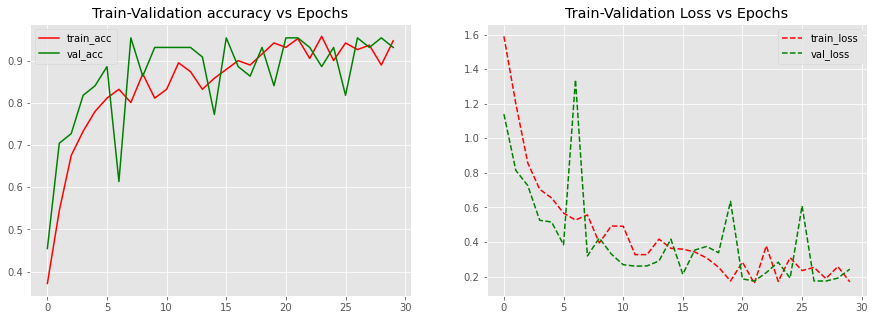

In [ ]:
plot_performance(model_final.history)

**Observations:**

1. Overfitting is almost reduced.
2. Train loss is reducing smoothly as before.
3. Test loss is also reuducing gradually with some one-off spikes.

In [ ]:
# Checking for the epochs with top 10 validation accuracy

log=pd.read_csv('training.log',index_col=0)
log.sort_values(by='val_accuracy',ascending=False).head(10)

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
15,0.879581,0.358365,0.954545,0.213153
28,0.890052,0.257945,0.954545,0.191054
26,0.926702,0.252841,0.954545,0.174440
7,0.801047,0.556649,0.954545,0.319269
21,0.952880,0.160084,0.954545,0.174038
20,0.931937,0.283542,0.954545,0.186366
12,0.874346,0.326796,0.931818,0.261456
27,0.937173,0.188202,0.931818,0.173855
24,0.900524,0.309012,0.931818,0.190682


In [30]:
# Model the model with the highest val_accuracy

mod=load_model(f'{data_folder}Model_weights\\model.27-0.28.h5')

## 4. Visualize the predictions

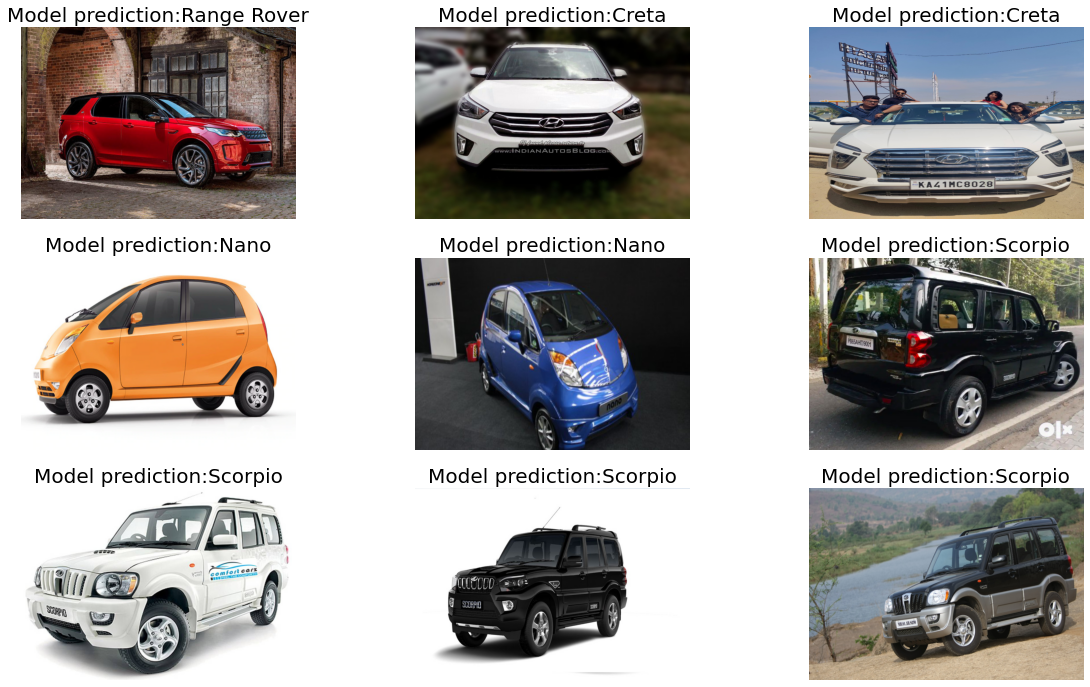

In [32]:
rcParams['figure.figsize']=(20,12)
import random
for i,j in enumerate(random.sample(range(1,24),9)):   
    try:
        img_test_path=f'{data_folder}Test_images\\img{j}.png'
    except:
        img_test_path=f'{data_folder}Test_images\\img{j}.jpeg'
    #print(img_test_path)
    

    img=image.load_img(img_test_path,target_size=(224,224))
    img_ar=image.img_to_array(img)
    img_ar_ex=np.expand_dims(img_ar,axis=0)
    img_p=tf.keras.applications.mobilenet.preprocess_input(img_ar_ex)

    pred=mod.predict_classes(img_p)

    def predict_car(pred=pred):
        for i,j in train_data.class_indices.items():
            if pred==j:
                return f"Model prediction:{i}"
            
    plt.subplot(3,3,i+1)
    plt.grid(False)
    plt.axis('off')
    plt.title(predict_car(),{'fontsize': 20,'color':'black'})
    img=cv2.imread(img_test_path)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img ,(1000,700))
    plt.imshow(img)


## 5. Analysis of the accuracy and loss of all the models built

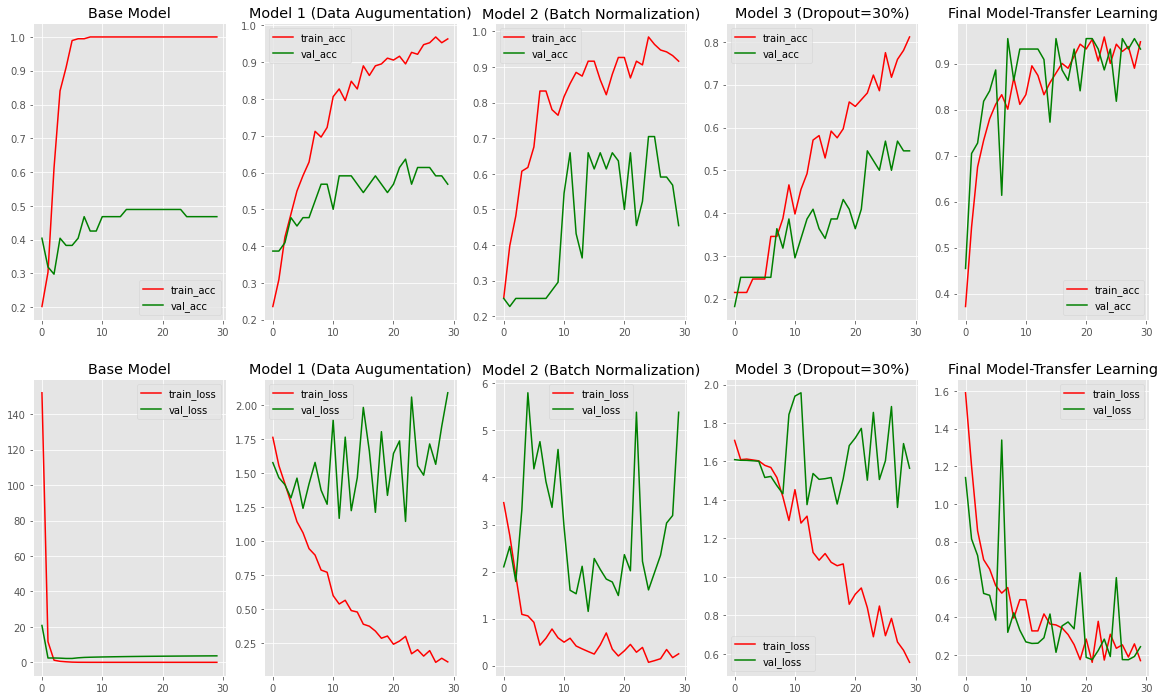

In [ ]:
plt.style.use('ggplot')
rcParams['figure.figsize']=(20,12)
plt.subplot(2,5,1)
plt.plot(model.history.history['accuracy'], 'r', label='train_acc')
plt.plot(model.history.history['val_accuracy'], 'g', label='val_acc')
plt.title('Base Model')
plt.legend()

plt.subplot(2,5,2)
plt.plot(model1.history.history['accuracy'], 'r', label='train_acc')
plt.plot(model1.history.history['val_accuracy'], 'g', label='val_acc')
plt.title('Model 1 (Data Augumentation)')
plt.legend()

plt.subplot(2,5,3)
plt.plot(model2.history.history['accuracy'], 'r', label='train_acc')
plt.plot(model2.history.history['val_accuracy'], 'g', label='val_acc')
plt.title('Model 2 (Batch Normalization)')
plt.legend()

plt.subplot(2,5,4)
plt.plot(model3.history.history['accuracy'], 'r', label='train_acc')
plt.plot(model3.history.history['val_accuracy'], 'g', label='val_acc')
plt.title('Model 3 (Dropout=30%)')
plt.legend()

plt.subplot(2,5,5)
plt.plot(model_final.history.history['accuracy'], 'r', label='train_acc')
plt.plot(model_final.history.history['val_accuracy'], 'g', label='val_acc')
plt.title('Final Model-Transfer Learning')
plt.legend()

plt.subplot(2,5,6)
plt.plot(model.history.history['loss'], 'r', label='train_loss')
plt.plot(model.history.history['val_loss'], 'g', label='val_loss')
plt.title('Base Model')
plt.legend()

plt.subplot(2,5,7)
plt.plot(model1.history.history['loss'], 'r', label='train_loss')
plt.plot(model1.history.history['val_loss'], 'g', label='val_loss')
plt.title('Model 1 (Data Augumentation)')
plt.legend()

plt.subplot(2,5,8)
plt.plot(model2.history.history['loss'], 'r', label='train_loss')
plt.plot(model2.history.history['val_loss'], 'g', label='val_loss')
plt.title('Model 2 (Batch Normalization)')
plt.legend()

plt.subplot(2,5,9)
plt.plot(model3.history.history['loss'], 'r', label='train_loss')
plt.plot(model3.history.history['val_loss'], 'g', label='val_loss')
plt.title('Model 3 (Dropout=30%)')
plt.legend()

plt.subplot(2,5,10)
plt.plot(model_final.history.history['loss'], 'r', label='train_loss')
plt.plot(model_final.history.history['val_loss'], 'g', label='val_loss')
plt.title('Final Model-Transfer Learning')
plt.legend()
plt.show()

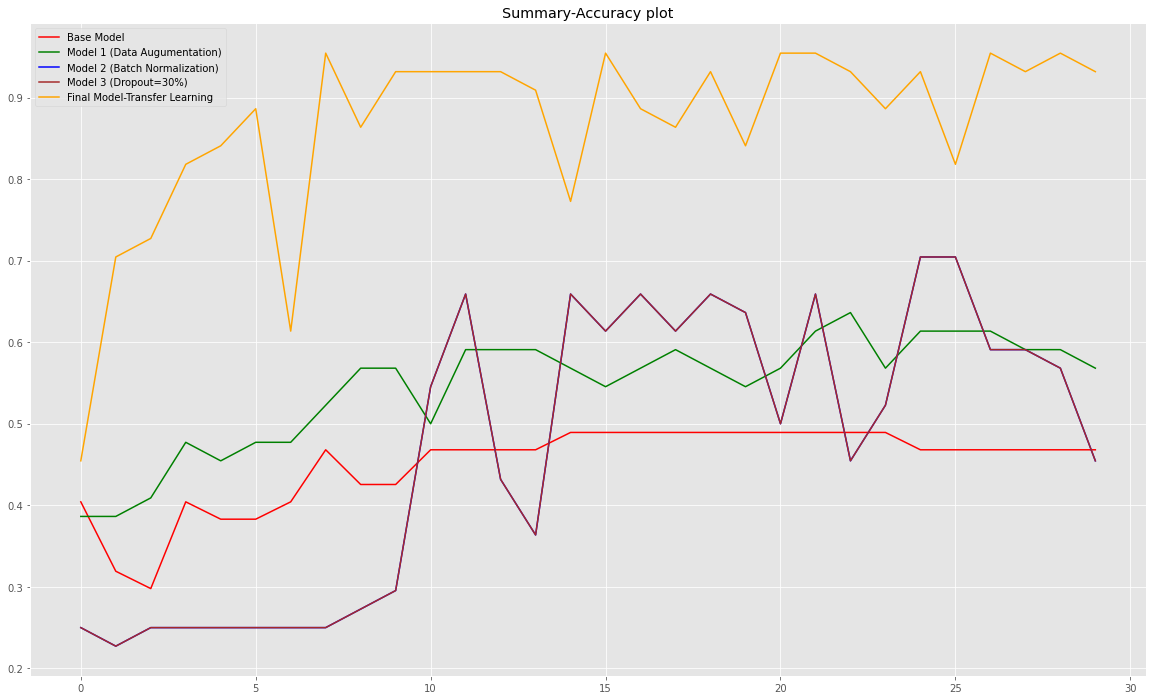

In [ ]:
rcParams['figure.figsize']=(20,12)
plt.plot(model.history.history['val_accuracy'], 'r', label='val_acc')
plt.plot(model1.history.history['val_accuracy'], 'g', label='val_acc')
plt.plot(model2.history.history['val_accuracy'], 'b', label='val_acc')
plt.plot(model2.history.history['val_accuracy'], 'brown', label='val_acc')
plt.plot(model_final.history.history['val_accuracy'], 'orange', label='val_acc')
plt.legend(['Base Model','Model 1 (Data Augumentation)','Model 2 (Batch Normalization)','Model 3 (Dropout=30%)','Final Model-Transfer Learning'])
plt.title("Summary-Accuracy plot")
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gradio

In [35]:
model_load=load_model(f'{data_folder}Model_weights\\model.27-0.28.h5')
def prediction(image):
    image = image.reshape((1, 224, 224, 3))
    image=tf.keras.applications.mobilenet.preprocess_input(image)
    prediction = model_load.predict(image).flatten()
    return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:

image1 = gr.inputs.Image(shape=(224,224))
label1 = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=prediction, inputs=image1, outputs=label1,interpretation='default').launch(debug='True')